<a href="https://colab.research.google.com/github/kdtrinh/probabilitytheoryandpython/blob/main/LLN_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The law of large numbers and the central limit theorem

> Objective: to illustrate *the law of large numbers* and *the central limit theorem*, two fundemental results in probability theory.

# 1. Law of large numbers (LLN)

**Theorem (LLN).** Let $\{X_n\}_{n \ge 1}$ be an i.i.d. sequence of random variables with finite mean value $\mu = \mathbb E[X_1]$. Then as $n \to \infty$,
$$
  \frac{X_1 + X_2 + \cdots + X_n}{n} \to \mu \quad \text{almost surely.}
$$

*Meaning.* All $X_n$ are defined on the same probability space $(\Omega, \mathcal F, \mathbb P)$. There is a measurable set $\Omega_0 \in \mathcal F$ of full measure $(\mathbb P(\Omega_0) = 1)$ such that for any $\omega \in \Omega_0$, 
$$
  \frac{X_1(\omega) + X_2(\omega) + \cdots + X_n(\omega)}{n} \to \mu.
$$
Note that for each $\omega \in \Omega$, the sequence $\{X_n(\omega)\}_{n \ge 1}$ is a sequence of real numbers.

*What's more?* There is a measurable set $\Omega_1 \in \mathcal F$ of full measure such that for each $\omega \in \Omega_1$, 
$$
  \lim_{n \to \infty}\frac{1}{n} \# \Big\{1 \le i \le n : X_i(\omega) \in (a, b] \Big\} = \mathbb P(X_1 \in (a, b]), \quad \text{for any } a < b.
$$ 
Here $\# A$ denotes the number of elements in a set $A$. Moreover, the Glivenko--Cantelli theorem states that the above convergence holds uniformly in $a$ and $b$.

Consequently, for almost surely $\omega \in \Omega$ (for $\omega$ belonging to a full measure set), from the sequence of real numbers $\{X_n(\omega)\}_{n \ge 1}$, we can calculate the mean value $\mathbb E[X_1]$ and determine the distribution of $X_1$. 

## Illustration of the law of large numbers

### (Pseudo) random numbers. 

For a given distribution $F$, we try to generate a sequence of real numbers $\{x_n\}_{n \ge 1}$ which can be viewed as a realization of an i.i.d. sequence $\{X_n\}_{n \ge 1}$ having the common distribution $F$ at some $\omega \in \Omega$, that is,
$$
  x_n = X_n(\omega), \quad n = 1,2, \dots.
$$
(That $\omega$ should belong to $\Omega_0 \cap \Omega_1$.) A sequence which is generated by an algorithm in a computer software is called psedo-random. Here is an example to generate a pseudo-random sequence from the standard Gaussian/normal distribution by using `numpy.random.default_rng()`.


*The standard normal distribution $\mathcal N(0, 1)$* is the distribution with the following probability density function (pdf)
$$
  f(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}2}, \quad x \in (-\infty, \infty).
$$
Let $X$ be a random variable with the standard normal distribution, $X \sim \mathcal N(0, 1)$. Then the following hold

- For any $a < b$, 
$$
  \mathbb P(X \in (a, b)) = \mathbb P(X \in [a, b]) = \int_a^b f(x) dx. 
$$

- The mean value of $X$ is zero: 
$$
  \mathbb E[X] = 0.
$$

- The variance of $X$ is one:
$$
  \mathrm {Var}[X] = 1.
$$

### Generate $n=10$ (pseudo-)random numbers from the standard normal distribution

In [ ]:
import numpy as np 
rng = np.random.default_rng()
n = 10 # size of the data
x = rng.normal(size=n)

rngSecondTime = np.random.default_rng()
y = rng.normal(size=n)

print("The first sequence: ", x)
print("The second sequence: ", y)

The first sequence:  [ 0.53452669  1.62427769 -1.6662916   0.33482422 -0.52519326  1.7726795
  0.39516362 -0.7818796  -0.07826166  0.32513938]
The second sequence:  [ 1.42417752  1.59749773 -0.56866678  0.43160684  0.40798132 -0.04389368
 -0.01336414  0.17368595  1.27982873  0.39549062]


In [ ]:
# When we add seed=, we will get the same sequence everytime
n = 10
rng42 = np.random.default_rng(seed=42)
x = rng42.normal(size=n)

rng42SecondTime = np.random.default_rng(seed=42)
y = rng42SecondTime.normal(size=n)
print("The first sequence: ", x)
print("The second sequence: ", y)

The first sequence:  [ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
  0.1278404  -0.31624259 -0.01680116 -0.85304393]
The second sequence:  [ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
  0.1278404  -0.31624259 -0.01680116 -0.85304393]


## Illustration of the law of large numbers (conti.)
We generate $n=1000$ pseudo-random numbers $x=[x_1, x_2, \dots, x_n]$ from the standard normal distribution. From the LLN, we expect that the sample mean 
$$
  \bar x = \frac{x_1 + x_2 + \cdots + x_n}{n}
$$
is approximately zero (the mean value of the standard normal distribution).

The (sample) mean value of a sequence $x$ can be calculated by `numpy.mean(x)`. 

In [ ]:
# Illustration of the LLN
import numpy as np
from numpy import mean

n = 1000
x = np.random.default_rng().normal(size=n)

sampleMean = mean(x) 
print("The sample mean of the data: ", sampleMean)
# By the LLN, the number sampleMean should be near zero


The sample mean of the data:  0.018967940231985912


## Illustration of the Glivenko--Cantelli theorem by drawing a histogram

[ 0.6020937   1.23995681 -0.23996409 ... -0.79200291  1.06200383
 -0.37930738]


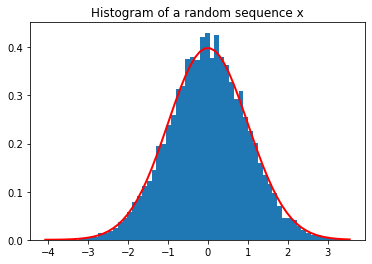

In [ ]:
# Illustration of the Glivenko--Cantelli theorem
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt

n = 10000
x = np.random.default_rng().normal(size=n)
print(x)

count, bins, ignored = plt.hist(x, bins='auto', density=True)
plt.plot(bins, 1/(sqrt(2 * pi)) * exp( - bins**2 / 2), linewidth=2, color='r')
plt.title("Histogram of a random sequence x")
plt.show()

# 2. Central limit theorem (CLT)
**Theorem (CLT).** Let $\{X_n\}_{n \ge 1}$ be an i.i.d. sequence of random variables with mean $\mu = \mathbb E[X_1]$ and $\sigma^2 = \mathrm {Var} [X_1] \in (0, \infty)$. Then as $n \to \infty$, 
$$
  \sqrt{n} \left( \frac{X_1 + X_2 + \cdots + X_n}{n} - \mu \right) = \frac{X_1 + X_2 + \cdots + X_n - n \mu}{\sqrt n} \to \mathcal N(0, \sigma^2) \quad \text{in distribution.}
$$
Equivalently, for any $a < b$, as $n \to \infty$, 
$$
  \mathbb P (T_n \in (a, b)) = \int_a^b f_\sigma(x) dx.
$$ 
Here 
$$
  T_n := \frac{X_1 + X_2 + \cdots + X_n - n \mu}{\sqrt n},
$$
and 
$$
  f_\sigma = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{x^2}{2\sigma^2}}
$$
is the pdf of the Gaussian distribution $\mathcal N(0, \sigma^2)$ with mean zero and variance $\sigma^2$.



## Illustration of the central limit theorem
Let us consider an i.i.d. sequence from the uniform distribution on $(0,1)$. In this case, 
$$
  \mu = \int_0^1 x dx = \frac12,
$$
and 
$$
  \sigma^2 = \int_0^1 x^2 dx - \mu^2 = \frac13 - \frac14 = \frac1{12}. 
$$

In [ ]:
# Generate n random numbers from the uniform distributio on (0, 1)
# Then calculate T_n
from numpy import random, pi, sqrt, exp, mean
n = 10
mu = .5
sigma = sqrt(1/12)

x = random.default_rng().random(size=n)
print(str(n)+" random numbers:", x)

tn = sqrt(n) * (mean(x) - mu)
print("T_n: ", tn)

10 random numbers: [0.20242904 0.39946941 0.44684878 0.1284914  0.3712544  0.34169885
 0.4452257  0.25702621 0.9461031  0.42685524]
T_n:  -0.3271685693193973


In [ ]:
# Generate T_n m times
from numpy import random, pi, sqrt, exp, sum
n = 10
m = 5
mu = .5
sigma = sqrt(1/12)

x = random.default_rng().random(size=(n, m))
print("data: ")
print(x)

tn = sqrt(n) * (mean(x, axis=0) - mu)
print("T_n:")
print(tn)

data: 
[[0.06748975 0.46697702 0.3517573  0.15986657 0.62721179]
 [0.33708913 0.71832834 0.6824526  0.59875377 0.05893   ]
 [0.40223752 0.98919507 0.55553994 0.28754533 0.13461491]
 [0.24157812 0.300835   0.94004193 0.72866682 0.82128932]
 [0.59478968 0.75006968 0.33520069 0.45431518 0.66109545]
 [0.20985037 0.76275009 0.97227795 0.61524489 0.56296907]
 [0.42976404 0.55982916 0.7850918  0.5427219  0.62770954]
 [0.97434276 0.9108276  0.86067786 0.31076477 0.63667032]
 [0.39683533 0.78406753 0.88086735 0.4396931  0.84769971]
 [0.77465582 0.04806953 0.35601189 0.66873621 0.19425396]]
T_n:
[-0.18068226  0.40823393  0.54388625 -0.06125062  0.0545316 ]


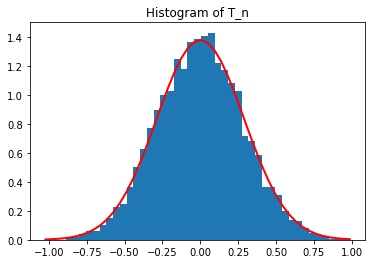

In [ ]:
# Generate T_n m times
from numpy import random, pi, sqrt, exp, sum
import matplotlib.pyplot as plt

n = 50
m = 5000
mu = .5
sigma2 = 1/12

x = random.default_rng().random(size=(n, m))
tn = sqrt(n) * (mean(x, axis=0) - mu)

count, bins, ignored = plt.hist(tn, bins='auto', density=True)
plt.plot(bins, 1/(sqrt(2 * pi * sigma2)) * exp( - bins**2 / (2 * sigma2)), linewidth=2, color='r')
plt.title("Histogram of T_n")
plt.show()


## Author

<a href="https://sites.google.com/site/kdtrinhprob/Home" target="_blank">Khanh Duy Trinh</a>

> 2021-08-25: Created